In [10]:
import SimpleLogisticRegression as logreg 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([2, 5, 10, 20, 25, 30, 2, 5, 10, 20, 25, 30])
Y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])


counts = [428, 397, 330, 204, 94, 51]
altCounts = [500 - i for i in counts]
counts = counts + altCounts

Xtrain = np.repeat(X, counts)
Ytrain = np.repeat(Y, counts)

In [3]:
glm = logreg.SimpleLogistic(Xtrain, Ytrain)

In [4]:
# manually calculate the log likelihood:

l = 0
for y, x in zip(Ytrain, Xtrain):
    l += y*(0.1 + 0.1*x) - np.log(1 + np.exp(0.1 + 0.1*x))

print(-2*l)
print(glm.deviance())

4631.406703156137
4631.406703155841


In [5]:
print(glm.gradient())
print(glm.finite_dif_gradient())



(1757.016432152526, 17878.153039974954)
(1757.0167983649299, 17878.153721540002)


In [6]:
glm.minimize_deviance(0.000005, 30000, verbose = True)

deviance || partial_alpha || partial_beta || norm_grad
4282.535785      8.000000      -17798.000000     17798.000000
deviance || partial_alpha || partial_beta || norm_grad
3585.976825      486.103440      -3471.045423     3471.045423
deviance || partial_alpha || partial_beta || norm_grad
3402.171837      514.665138      -78.913580     514.665138
deviance || partial_alpha || partial_beta || norm_grad
3293.657810      417.430273      -19.873956     417.430273
deviance || partial_alpha || partial_beta || norm_grad
3222.347255      340.091082      -16.232078     340.091082
deviance || partial_alpha || partial_beta || norm_grad
3174.598715      279.596139      -13.364881     279.596139
deviance || partial_alpha || partial_beta || norm_grad
3142.071117      231.729194      -11.086405     231.729194
deviance || partial_alpha || partial_beta || norm_grad
3119.573173      193.413435      -9.257704     193.413435
deviance || partial_alpha || partial_beta || norm_grad
3103.806839      162.410816 

deviance || partial_alpha || partial_beta || norm_grad
3062.871679      0.011929      -0.000570     0.011929
deviance || partial_alpha || partial_beta || norm_grad
3062.871679      0.010384      -0.000497     0.010384
deviance || partial_alpha || partial_beta || norm_grad
3062.871679      0.009039      -0.000432     0.009039
deviance || partial_alpha || partial_beta || norm_grad
3062.871679      0.007868      -0.000376     0.007868
deviance || partial_alpha || partial_beta || norm_grad
3062.871679      0.006849      -0.000328     0.006849
deviance || partial_alpha || partial_beta || norm_grad
3062.871679      0.005962      -0.000285     0.005962
deviance || partial_alpha || partial_beta || norm_grad
3062.871679      0.005190      -0.000248     0.005190
deviance || partial_alpha || partial_beta || norm_grad
3062.871679      0.004517      -0.000216     0.004517
deviance || partial_alpha || partial_beta || norm_grad
3062.871679      0.003932      -0.000188     0.003932
deviance || partial

3062.8716790843255

In [7]:
glm.alpha, glm.beta

(-2.0765646888429554, 0.1358507802553606)

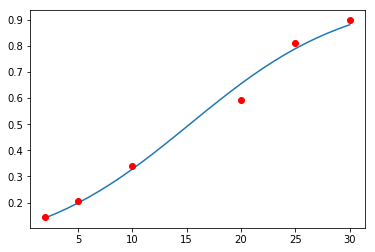

In [14]:
x = range(2, 31)
estimates = glm.disp_probabilities(x)

observed = [0.144, 0.206, 0.34, 0.592, 0.812, 0.898]
plt.plot(x, estimates)
plt.plot([2, 5, 10, 20, 25, 30], observed, 'ro')
plt.show()